In [1]:
# LDA1 and LDA2

import numpy as np
import math
import matplotlib.pyplot as plt
import csv 
import re # for reading data from txt files

Natoms = 8
dim = 3
Nmin = 8
beta = 20

In [2]:
def read_FEdata_files(beta):
    fname = "Data/LJ"+str(Natoms) + "free_energy_beta"+str(beta)+".txt"

    # read free energy
    FE = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            FE.append(values)
        print(np.shape(FE))
        FE = np.array(FE)
        print(np.shape(FE))

    # read the bicubic matrix file
    fname = "Data/LJ"+str(Natoms) + "free_energy_bicubic_matrix_beta"+str(beta)+".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return FE,bicubic_matrix

def read_Mdata_files(entry,beta):
    fname = "Data/LJ"+str(Natoms) + "_M" + str(entry) + "_beta" + str(beta) + ".txt"

    # read free energy
    M = []
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            M.append(values)
        print(np.shape(M))
        M = np.array(M)
        print(np.shape(M))

    # read the bicubic matrix file
    fname = "Data/LJ"+str(Natoms) + "_M" + str(entry) + "_bicubic_matrix_beta" + str(beta) + ".txt"

    bicubic_matrix = [] 
    with open(fname, "r") as f:
        for line in f:
            # cleaning the bad chars in line
            line = line.strip()
            line = line.strip(" \\n")
            line = re.sub(r"(-[0-9]+\.)", r" \1", line)
            values = [float(value) for value in line.split()]
            bicubic_matrix.append(values)
    print(np.shape(bicubic_matrix))
    bicubic_matrix = np.array(bicubic_matrix)
    print(np.shape(bicubic_matrix))
    return M,bicubic_matrix


def bicubic_interpolation(bicubic_matrix,xgrid,ygrid,dx,dy,x,y):
    # FEval(x,y) = \sum_{i,j=0}^3 a(i,j)x^i y^j
    # FEder1(x,y) = \sum_{i=1}^3\sum{j=0}^3 a(i,j)ix^{i-1} y^j
    # FEder2(x,y) = \sum_{i=0}^3\sum{j=1}^3 a(i,j)jx^i y^{j-1}
    N1 = np.size(xgrid)
    N2 = np.size(ygrid)
   
    # find the cell
    i = min(max(0,int(np.floor((x - xgrid[0])/dx))),N1-2)
    j = min(max(0,int(np.floor((y - ygrid[0])/dy))),N2-2)
    x = (x - xgrid[0] - dx*i)/dx # x in cell rescaled to [0,1]
    y = (y - ygrid[0] - dy*j)/dy # y in cell rescaled to [0,1]
    
    ind = i + N1*j
    ishift = ind
    val = 0.0
    grad_x = 0.0
    grad_y = 0.0
    for i in range(4):
        for j in range(4):
            val = val + bicubic_matrix[ishift,i*4 + j]*(x**i)*(y**j)

#     for i in range(1,4):
#         for j in range(4):
#             grad_x = grad_x + bicubic_matrix[ishift,i*4 + j]*i*(x**(i-1))*(y**j)

#     for i in range(4):
#         for j in range(1,4):
#             grad_y = grad_y + bicubic_matrix[ishift,i*4 + j]*(x**i)*j*(y**(j-1))
    
#     grad_x = grad_x/dx
#     grad_y = grad_y/dy
    
    return val #,grad_x,grad_y


In [3]:
# draw ellipse
def compute_ellipse_data(x0,y0,M,scale):
    evals,evecs = np.linalg.eig(M)
    t = np.linspace(0,2*np.pi,50)
    x = x0 + scale*(evecs[0,0]*evals[0]*np.cos(t) + evecs[0,1]*evals[1]*np.sin(t))
    y = y0 + scale*(evecs[1,0]*evals[0]*np.cos(t) + evecs[1,1]*evals[1]*np.sin(t))
    return x,y


In [4]:
# read the parameter file
fname = "Data/bicubic_params.txt"
line_count = 0
with open(fname, "r") as f:
    for line in f:
        line = line.strip()
        line = line.strip(" \\n")
        line = re.sub(r"(-[0-9]+\.)", r" \1", line)
        print(line)
        line_count = line_count + 1
        if line_count == 1:
            N1 = int(line)
        elif line_count == 2:
            N2 = int(line)
        elif line_count == 3:
            h1 = float(line)
        elif line_count == 4:
            h2 = float(line)
        elif line_count == 5:    
            val1_min = float(line)
        elif line_count == 6: 
            val1_max = float(line)
        elif line_count == 7:
            val2_min = float(line)
        elif line_count == 8: 
            val2_max = float(line)
print(N1)
print(N2)
print(h1)
print(h2)
print(val1_min)
print(val1_max)
print(val2_min)
print(val2_max)


129
129
1.4109499488e-02
2.2518285321e-02
 -7.4218496509e-01
1.0638309693e+00
 -3.7361861951e+00
 -8.5384567399e-01
129
129
0.014109499488
0.022518285321
-0.74218496509
1.0638309693
-3.7361861951
-0.85384567399


In [5]:
# read data files
FE, bicubic_matrix = read_FEdata_files(beta)
M11, M11_bicubic_matrix = read_Mdata_files(11,beta)
M12, M12_bicubic_matrix = read_Mdata_files(12,beta)
M22, M22_bicubic_matrix = read_Mdata_files(22,beta)


(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)
(129, 129)
(129, 129)
(16641, 16)
(16641, 16)


In [6]:
# visualize the free energy
CV1grid = np.linspace(val1_min,val1_max,N1)
CV2grid = np.linspace(val2_min,val2_max,N1)

def contourf_func(func,beta,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contourf(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel("CV1")
    plt.ylabel("CV2")
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    #axes.set_aspect(1)
    plt.savefig(fig_name)

In [7]:
dir = "Data/"
LDAmatrix = np.loadtxt(dir+"LDAbasis.csv", delimiter=',', dtype=float)

def Dist_Sq_Matrix(x): # matrix of distances squared
    Na = np.size(x,axis = 1)
    D2 = np.zeros((Na,Na))
    for j in range(Na):
        D2[j,:] = (x[0,:]-x[0,j])**2 + (x[1,:]-x[1,j])**2 + (x[2,:]-x[2,j])**2
    return D2

def sort_coord_num(x):
    Na = np.size(x,axis = 1)
    D2 = Dist_Sq_Matrix(x)
    coord_num = np.zeros((Na,))
    for j in range(Na):
        ind = np.setdiff1d(range(Na),np.array([j]))
        aux = (D2[j,ind]/2.25)**4
        coord_num[j] = np.sum((np.ones((1,Na-1))-aux)/(np.ones((1,Na-1))-aux**2))
    return np.sort(coord_num) 

# def sortdist2(xyz):
#     d2 = np.zeros(int((Natoms*(Natoms-1)/2),))
#     count = 0
#     for j in range(1,Natoms):
#         for k in range(j):
#             d2[count] = np.sum((xyz[:,j]-xyz[:,k])**2)
#             count = count + 1
#     return np.sort(d2)        
            
def CV(xyz):
    sort_cnum = sort_coord_num(xyz)
    LDAcv = np.matmul(sort_cnum,LDAmatrix)
    return LDAcv


In [8]:
# load the list of minima and saddles of LJ7 in 2D
XYZlist = np.loadtxt("LJ8data/min_xyz.csv", delimiter=',', dtype=float)
# format: each row x0,x1,...,x7,y0,y1,...,y7,z0,z1,...,z7
CVlist = np.zeros((Nmin,2))
for j in range(Nmin):
    CVlist[j,0],CVlist[j,1] = CV(np.reshape(XYZlist[3*j:3*(j+1),:],(dim,Natoms)))


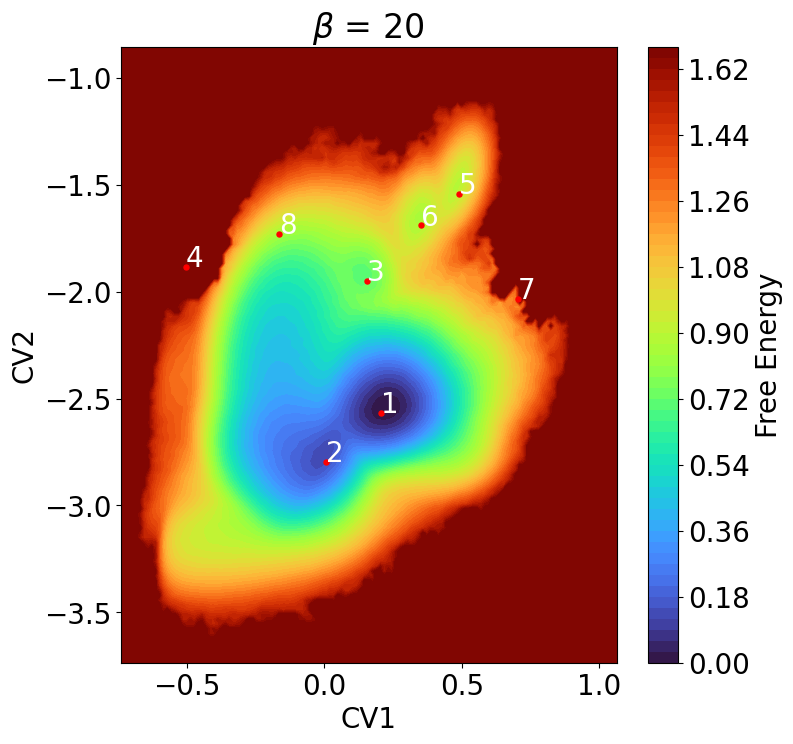

In [9]:
fig_name = "Figures/FE_LJ"+str(Natoms)+"in"+str(dim)+"Dbeta" + str(beta) + "_binning.pdf"
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
plt.contourf(CV1grid,CV2grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')
# plt.contour(CV1grid,CV2grid,FE, levels=[0.5])

# plt.plot(CVmep[:,0],CVmep[:,1],color = "white")
# print(CVlist)
for j in range(Nmin):
    plt.text(CVlist[j,0],CVlist[j,1],str(j+1),color = 'white')
#     #axes.set_aspect(1)
plt.savefig(fig_name)

In [10]:
def visualize_diffusion_matrix(func,M11,M12,M22,beta,step,x,y,str_func,fig_name):
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))
    plt.contour(x,y,func, levels=60, cmap='turbo')
    cbar = plt.colorbar()
    cbar.set_label(str_func, size=20)
    plt.xlabel("CV1")
    plt.ylabel("CV2")
    plt.title(r'$\beta$' + ' = ' + str(beta))
    axes=plt.gca()
    N2,N1 = np.shape(func)
    scale = 2e-3
    for i in range(0,N1,step):
        for j in range(0,N2,step):
            M = np.array([[M11[j,i],M12[j,i]],[M12[j,i],M22[j,i]]]);
            edata0,edata1 = compute_ellipse_data(x[i],y[j],M,scale)
            plt.plot(edata0,edata1,color = "black",linewidth = 0.5)
    plt.savefig(fig_name)

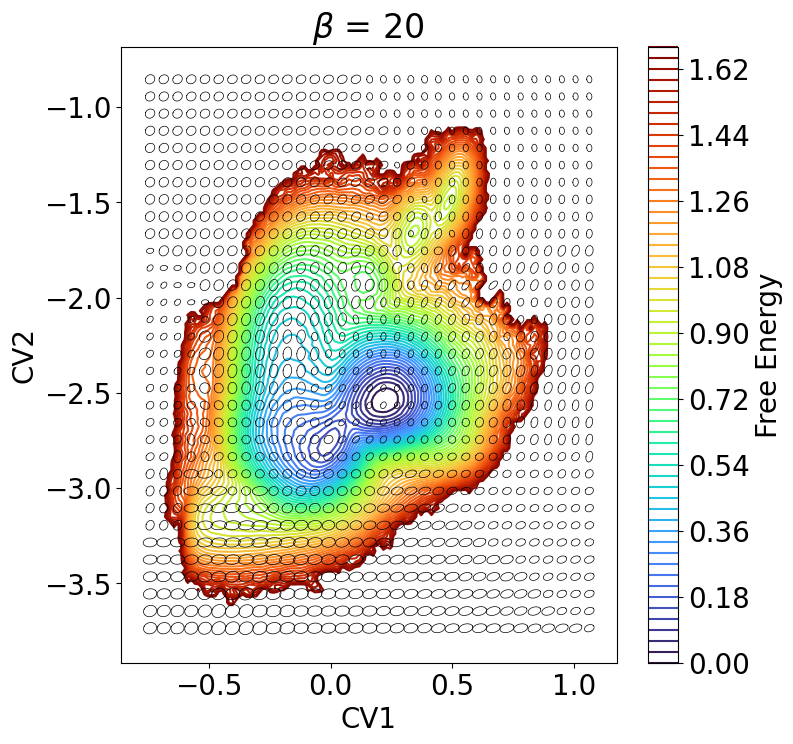

In [11]:
step = 4
fname = "Figures/LJ"+str(Natoms)+"_FE_DiffMatr_beta"+str(beta)+".pdf"
visualize_diffusion_matrix(FE,M11,M12,M22,beta,step,CV1grid,CV2grid,"Free Energy",fname)

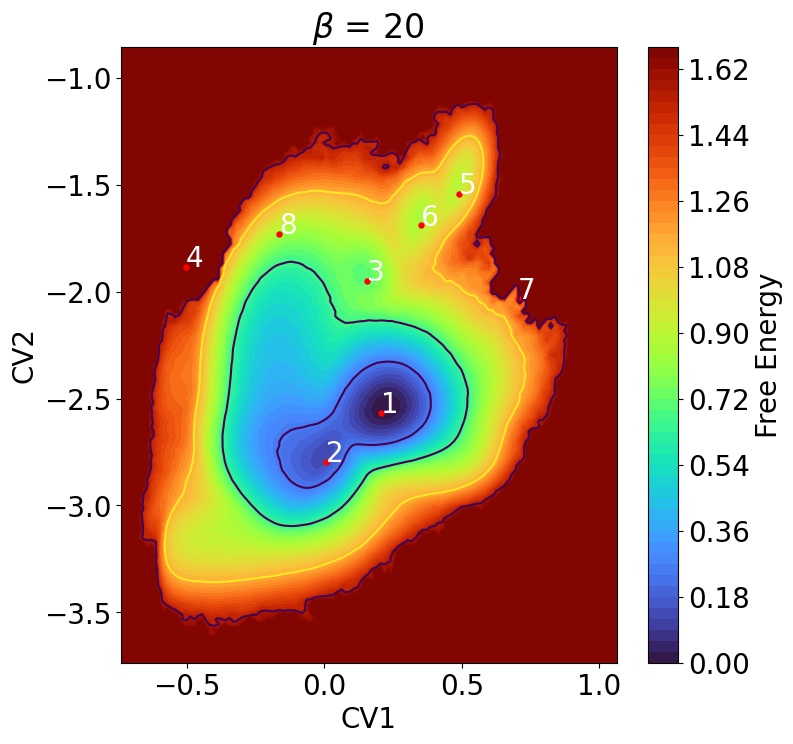

In [12]:
# Committor Problem
# fig_name = "Figures/FE_LJ"+str(Natoms)+"in"+str(dim)+"Dbeta" + str(beta) + "_binning.pdf"
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111)
plt.contourf(CV1grid,CV2grid,FE, levels=60, cmap='turbo')
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')

feA = 0.25 # beta = 15

plt.contour(CV1grid,CV2grid,FE, levels=[feA])

# plt.plot(CVmep[:,0],CVmep[:,1],color = "white")
# print(CVlist)
for j in range(Nmin):
    plt.text(CVlist[j,0],CVlist[j,1],str(j+1),color = 'white')
#     #axes.set_aspect(1)
# plt.savefig(fig_name)


feB = [0.65,1.15] # beta = 15, 20

plt.contour(CV1grid,CV2grid,FE, levels=feB)

fe_outer = 1.55 # beta = 15, 20

plt.contour(CV1grid,CV2grid,FE, levels=[fe_outer])


/var/folders/tj/20hjj3p93ls3rkc91pc6nmb40000gn/T/ipykernel_23789/1891963288.py:21: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  level_set= cB.allsegs[1] # all connected components
/var/folders/tj/20hjj3p93ls3rkc91pc6nmb40000gn/T/ipykernel_23789/1891963288.py:26: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  level_set1 = cB.allsegs[0] # all connected components
/var/folders/tj/20hjj3p93ls3rkc91pc6nmb40000gn/T/ipykernel_23789/1891963288.py:52: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  level_set = outer_bdry.allsegs[0]
/var/folders/tj/20hjj3p93ls3rkc91pc6nmb40000gn/T/ipykernel_23789/1891963288.py:62: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two mino

(240, 2)
180
440
788


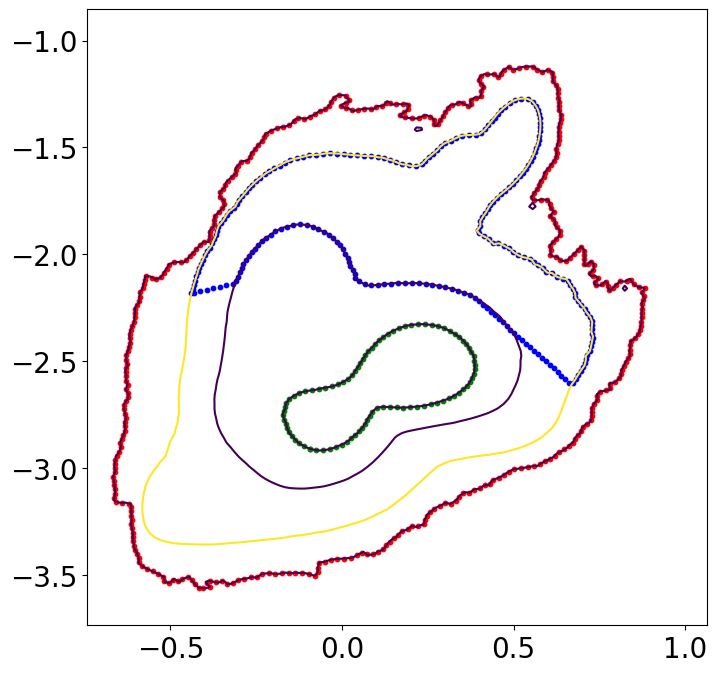

In [13]:
from distmesh import *
from FEM_TPT import *

plt.figure(figsize=(8,8))

# plt.contourf(CV1grid,CV2grid,FE, levels=60, cmap='turbo')
# cbar = plt.colorbar()
# cbar.set_label("Free Energy", size=20)
# plt.xlabel("CV1")
# plt.ylabel("CV2")
# plt.title(r'$\beta$' + ' = ' + str(beta))
# plt.scatter(CVlist[:,0],CVlist[:,1],s = 13, c = 'red')

cB = plt.contour(CV1grid,CV2grid,FE, feB)

# the desired size of mesh edge
h = 0.02

# set B around minimum 0
level_set_points = []
level_set= cB.allsegs[1] # all connected components


Bbdry = level_set[70:290] # the first connected component

level_set1 = cB.allsegs[0] # all connected components

Bbdry1 = level_set1[60:140] # the first connected component


x_values = np.linspace(Bbdry1[0,0], Bbdry[0,0], 20)[1:-1]
y_values = np.linspace(Bbdry1[0,1], Bbdry[0,1], 20)[1:-1]

Bbdry2 = np.stack((x_values, y_values), axis = 1)

x_values = np.linspace(Bbdry1[-1,0], Bbdry[-1,0], 20)[1:-1]
y_values = np.linspace(Bbdry1[-1,1], Bbdry[-1,1], 20)[1:-1]

Bbdry3 = np.stack((x_values, y_values), axis = 1)

Bbdry_all = np.vstack((Bbdry, Bbdry3[::-1], Bbdry1[::-1], Bbdry2))


Bbdry_all = reparametrization(Bbdry_all,h) 
plt.scatter(Bbdry_all[:,0],Bbdry_all[:,1],s = 10, c = 'blue')

print(Bbdry_all.shape)


# # ========== the outer boundary ============
outer_bdry = plt.contour(CV1grid,CV2grid,FE, [fe_outer])
level_set = outer_bdry.allsegs[0]
Obdry = level_set[:-18] # beta = 20
Obdry = reparametrization(Obdry,h)

# v_bdry = extract_contour(Bdry)
plt.scatter(Obdry[:,0],Obdry[:,1],s = 10, c = 'red')

# # ========== set A ============
cA = plt.contour(CV1grid,CV2grid,FE, levels=[feA])

level_setA = cA.allsegs[0] # all connected components

Abdry = level_setA[:] # the first connected component
Abdry = reparametrization(Abdry,h) 
plt.scatter(Abdry[:,0],Abdry[:,1],s = 10, c = 'green')


dirname = "FEMdataBETA"+str(beta)+"/"

# fbdry_name = ["A_bdry.csv","B_bdry.csv","O_bdry.csv"]
# Abdry.tofile(dirname+fbdry_name[0], sep = ',')
# Bbdry_all.tofile(dirname+fbdry_name[1], sep = ',')
# Obdry.tofile(dirname+fbdry_name[2], sep = ',')

print(np.size(Abdry))
print(np.size(Bbdry))
print(np.size(Obdry))

OmegaAB: Npts =  6511  Ntri =  11582
A: NptsA =  686  NtriA =  1192
B: NptsB =  2343  NtriB =  4204


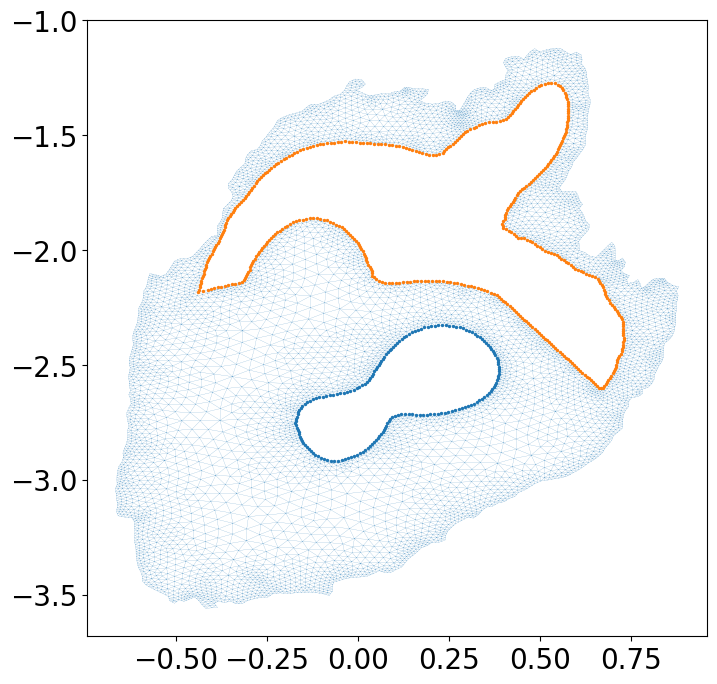

In [14]:
# Read the triangulation files
Aind = np.loadtxt(dirname +"Abdry.csv", delimiter=',', dtype=int)
Bind = np.loadtxt(dirname +"Bbdry.csv", delimiter=',', dtype=int)
pts = np.loadtxt(dirname +"pts.csv", delimiter=',', dtype=float)
ptsA = np.loadtxt(dirname +"ptsA.csv", delimiter=',', dtype=float)
ptsB = np.loadtxt(dirname +"ptsB.csv", delimiter=',', dtype=float)
tri = np.loadtxt(dirname +"tri.csv", delimiter=',', dtype=int)
triA = np.loadtxt(dirname +"triA.csv", delimiter=',', dtype=int)
triB = np.loadtxt(dirname +"triB.csv", delimiter=',', dtype=int)

Npts = np.size(pts,axis = 0)
Ntri = np.size(tri,axis = 0)
NptsA = np.size(ptsA,axis = 0)
NtriA = np.size(triA,axis = 0)
NptsB = np.size(ptsB,axis = 0)
NtriB = np.size(triB,axis = 0)

print("OmegaAB: Npts = ",Npts," Ntri = ",Ntri)
print("A: NptsA = ",NptsA," NtriA = ",NtriA)
print("B: NptsB = ",NptsB," NtriB = ",NtriB)

plt.figure(figsize=(8,8))
plt.triplot(pts[:,0],pts[:,1],tri,linewidth=0.1)
plt.scatter(pts[Aind,0],pts[Aind,1],s = 2)
plt.scatter(pts[Bind,0],pts[Bind,1],s = 2)
# plt.savefig('LJ72D_trimesh_ABellipses.pdf')

In [15]:
Fpts = np.zeros((Npts,))
M11pts = np.zeros((Npts,))
M12pts = np.zeros((Npts,))
M22pts = np.zeros((Npts,))
FptsA = np.zeros((NptsA,))
FptsB = np.zeros((NptsB,))

for j in range(Npts):
    Fpts[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M11pts[j] = bicubic_interpolation(M11_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M12pts[j] = bicubic_interpolation(M12_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    M22pts[j] = bicubic_interpolation(M22_bicubic_matrix,CV1grid,CV2grid,h1,h2,pts[j,0],pts[j,1])
    
for j in range(NptsA):
    FptsA[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsA[j,0],ptsA[j,1])

for j in range(NptsB):
    FptsB[j] = bicubic_interpolation(bicubic_matrix,CV1grid,CV2grid,h1,h2,ptsB[j,0],ptsB[j,1])

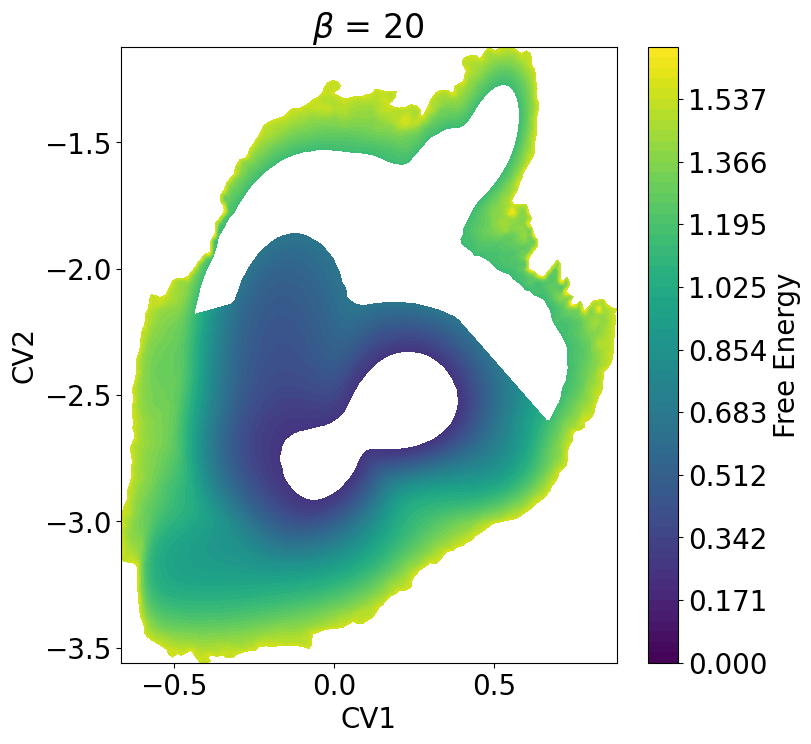

In [16]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,Fpts,np.linspace(np.min(FE),np.max(FE),60) )
cbar = plt.colorbar()
cbar.set_label("Free Energy", size=20)
plt.xlabel("CV1")
plt.ylabel("CV2")
plt.title(r'$\beta$' + ' = ' + str(beta))
axes=plt.gca()


In [17]:
# find the committor
q = FEM_committor_solver_var_diffusion_matrix(pts,tri,Aind,Bind,Fpts,M11pts,M12pts,M22pts,beta)

print(np.min(q))
print(np.max(q))

0.0
1.0000000000000029


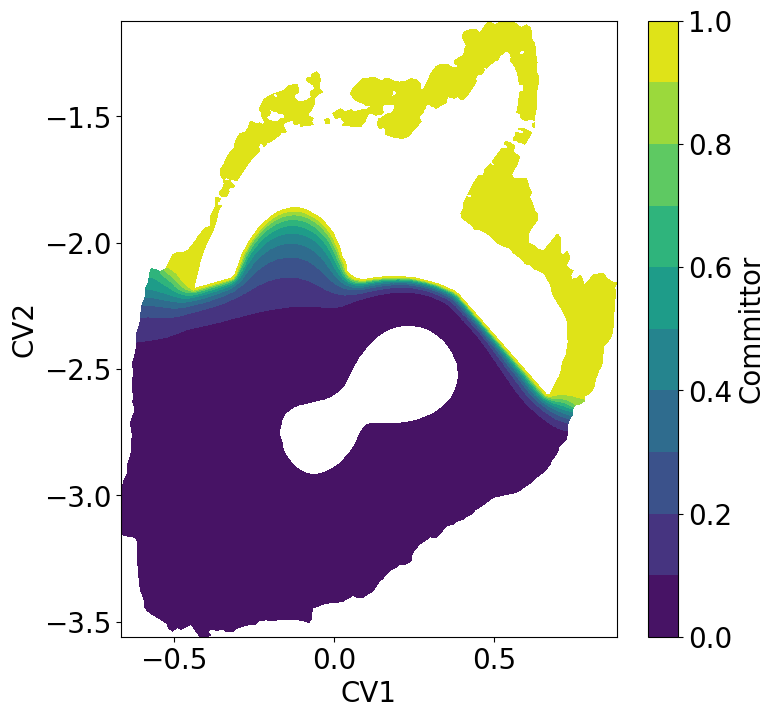

In [18]:
plt.figure(figsize=(8,8))    
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
plt.colorbar(label="Committor", orientation="vertical")
plt.xlabel("CV1")
plt.ylabel("CV2")
# axes=plt.gca()
# axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
fname = "Figures/Committor_min01_LDA12_BETA"+str(beta)+".pdf"
plt.savefig(fname)